# AC8

## Métodos numéricos

## Fernando do Rego Pessoa de Macedo Neto


## 1)

### sympy laplace transform:

EDO:


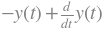

transformada da EDO:


solucao da EDO:


In [122]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy


####################################### fazendo a regra da transformada da derivada ###########################################
def laplace_transform_derivatives(e):
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

################################################## inicializando a EDO #######################################################
sympy.init_printing()
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
edo = y(t).diff(t) - y(t)
print("EDO:")
display(edo)
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
################################################## transformando a EDO #######################################################
L_edo = sympy.laplace_transform(edo, t, s, noconds=True)
L_edo = laplace_transform_derivatives(L_edo)
L_edo = L_edo.subs(L_y, Y)
init = {y(0): 1}
L_edo = L_edo.subs(init)
#################################################### resolvendo a EDO ########################################################
L_edo = sympy.solve(L_edo, Y)
print("transformada da EDO:")
display(L_edo)
################################################## transformando a EDO #######################################################
sympy.apart(L_edo[0])
res = sympy.inverse_laplace_transform(L_edo[0], s, t)
sympy.simplify(res)
print("solucao da EDO:")
display(res)

### sympy dsolve:

EDO:


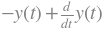

solucao:


C1:


e como y(t) = exp(t), C1 = 1 

solucao:


In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy

y0, t= sympy.symbols("y0, t")
y = sympy.Function("y")
edo = y(t).diff(t) - y(t)
print("EDO:")
display(edo)
res = sympy.dsolve(edo)
print("solucao:")
display(res)
ini = {y(0): y0}
constante = res.subs(t, 0).subs(ini)
constante = sympy.solve(constante)
res.subs(constante[0])
constante = sympy.solve(res)
print("C1:")
display(constante[0])
print("e como y(t) = exp(t), C1 = 1 \n")
print("solucao:")
final = sympy.exp(t)
display(final)

### odeint:

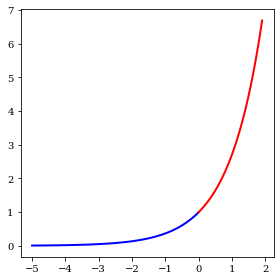

In [107]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy
################################################## inicializando a EDO #######################################################
t = sympy.symbols("t")
y = sympy.Function("y")
f = y(t)
f_np = sympy.lambdify((y(t), t), f, 'math')
y0 = 1
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
################################################## plotando os graficos #######################################################
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
fig.tight_layout()
plt.show()

## 2)

### sympy laplace transform:

EDO:


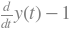

transformada da EDO:


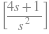

solucao da EDO:


In [118]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy


####################################### fazendo a regra da transformada da derivada ###########################################
def laplace_transform_derivatives(e):
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

################################################## inicializando a EDO #######################################################
sympy.init_printing()
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
edo = y(t).diff(t) - 1
print("EDO:")
display(edo)
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
################################################## transformando a EDO #######################################################
L_edo = sympy.laplace_transform(edo, t, s, noconds=True)
L_edo = laplace_transform_derivatives(L_edo)
L_edo = L_edo.subs(L_y, Y)
init = {y(0): 4}
L_edo = L_edo.subs(init)
#################################################### resolvendo a EDO ########################################################
L_edo = sympy.solve(L_edo, Y)
print("transformada da EDO:")
display(L_edo)
################################################## transformando a EDO #######################################################
sympy.apart(L_edo[0])
res = sympy.inverse_laplace_transform(L_edo[0], s, t)
sympy.simplify(res)
print("solucao da EDO:")
display(res)

### dsolve:

EDO:


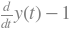

solucao:


Constante:


e como y0 = 4, y(t) =


In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
y0, t= sympy.symbols("y0, t")
y = sympy.Function("y")
edo = y(t).diff(t) - 1
print("EDO:")
display(edo)
res = sympy.dsolve(edo)
print("solucao:")
display(res)
ini = {y(0): y0}
constante = res.subs(t, 0).subs(ini)
constante = sympy.solve(constante)
res.subs(constante[0])
constante = sympy.solve(res)
print("Constante:")
display(constante[0])
print("e como y0 = 4, y(t) =")
a = 4 + t 
display(a)

### odeint:

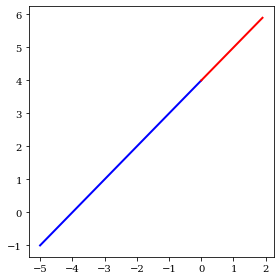

In [63]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy
################################################## inicializando a EDO #######################################################
t = sympy.symbols("t")
y = sympy.Function("y")
f = 1
f_np = sympy.lambdify((y(t), t), f, 'math')
y0 = 4
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
################################################## plotando os graficos #######################################################
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
fig.tight_layout()
plt.show()

## 3)
### a)
### sympy laplace transform:

EDO:


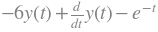

transformada da EDO =>  (2*s + 3)/(s**2 - 5*s - 6) 

solucao da EDO =>  (15*exp(7*t) - 1)*exp(-t)/7 



In [112]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy


####################################### fazendo a regra da transformada da derivada ###########################################
def laplace_transform_derivatives(e):
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

################################################## inicializando a EDO #######################################################
sympy.init_printing()
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
edo = y(t).diff(t) - 6 * y(t) - sympy.exp(-t)
print("EDO:")
display(edo)
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
################################################## transformando a EDO #######################################################
L_edo = sympy.laplace_transform(edo, t, s, noconds=True)
L_edo = laplace_transform_derivatives(L_edo)
L_edo = L_edo.subs(L_y, Y)
init = {y(0): 2}
L_edo = L_edo.subs(init)
#################################################### resolvendo a EDO ########################################################
L_edo = sympy.solve(L_edo, Y)
print("transformada da EDO => ",L_edo[0],"\n")
################################################## transformando a EDO #######################################################
sympy.apart(L_edo[0])
res = sympy.inverse_laplace_transform(L_edo[0], s, t)
sympy.simplify(res)
print("solucao da EDO => ",res,"\n")

### dsolve:

EDO:


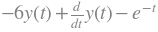

solucao:


Constante:


In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy

y0, t= sympy.symbols("y0, t")
y = sympy.Function("y")
edo = y(t).diff(t) - 6 * y(t) - sympy.exp(-t)
print("EDO:")
display(edo)
res = sympy.dsolve(edo)
print("solucao:")
display(res)
ini = {y(0): y0}
constante = res.subs(t, 0).subs(ini)
constante = sympy.solve(constante)
res.subs(constante[0])
constante = sympy.solve(res)
print("Constante:")
display(constante[0])

### odeint

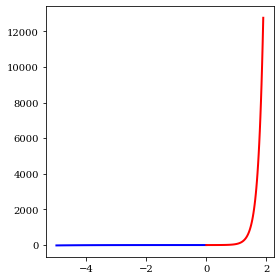

In [80]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy
################################################## inicializando a EDO #######################################################
t = sympy.symbols("t")
y = sympy.Function("y")
f = 6 * y(t) + sympy.exp(-t)
f_np = sympy.lambdify((y(t), t), f, 'math')
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
################################################## plotando os graficos #######################################################
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
fig.tight_layout()
plt.show()

### b)
### sympy laplace transform:

EDO:


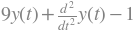

transformada da EDO:


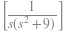

solucao da EDO:


In [146]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy


####################################### fazendo a regra da transformada da derivada ###########################################
def laplace_transform_derivatives(e):
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

################################################## inicializando a EDO #######################################################
sympy.init_printing()
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
edo = y(t).diff(t,2) + 9 * y(t) - 1
print("EDO:")
display(edo)
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
################################################## transformando a EDO #######################################################
L_edo = sympy.laplace_transform(edo, t, s, noconds=True)
L_edo = laplace_transform_derivatives(L_edo)
L_edo = L_edo.subs(L_y, Y)
init = {y(0): 0,y(t).diff(t).subs(t,0): 0}
L_edo = L_edo.subs(init)
#################################################### resolvendo a EDO ########################################################
L_edo = sympy.solve(L_edo, Y)
print("transformada da EDO:")
display(L_edo)
################################################## transformando a EDO #######################################################
sympy.apart(L_edo[0])
res = sympy.inverse_laplace_transform(L_edo[0], s, t)
sympy.simplify(res)
print("solucao da EDO:")
display(res)

### dsolve:

EDO:


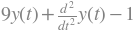

solucao:


Constante:


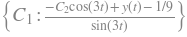

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy

y0, t= sympy.symbols("y0, t")
y = sympy.Function("y")
edo = y(t).diff(t,2) + 9 * y(t) - 1
print("EDO:")
display(edo)
res = sympy.dsolve(edo)
print("solucao:")
display(res)
ini = {y(0): y0}
constante = res.subs(t, 0).subs(ini)
constante = sympy.solve(constante)
res.subs(constante[0])
constante = sympy.solve(res)
print("Constante:")
display(constante[0])